<h1>Task 3: Model Creation & Evaluation</h1>

<h2>Model Training</h2>

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, confusion_matrix

In [2]:
df = pd.read_csv("cardio_cleaned.csv")
df

,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,age_years,age_group,ap_hi_z,ap_lo_z,bmi,ap_hi_log,ap_lo_log,bmi_log
0,2,168,62.0,110,80,1,1,0,0,1,0,50.0,2,-0.829405,-0.166623,21.967120,4.709530,4.394449,3.134064
1,1,156,85.0,140,90,3,1,0,0,1,1,55.0,3,0.526506,0.603754,34.927679,4.948760,4.510860,3.581508
2,1,165,64.0,130,70,3,1,0,0,0,1,51.0,3,0.074536,-0.937000,23.507805,4.875197,4.262680,3.198992
3,2,169,82.0,150,100,1,1,0,0,1,1,48.0,2,0.978476,1.374130,28.710479,5.017280,4.615121,3.391500
4,1,156,56.0,100,60,1,1,0,0,0,0,47.0,2,-1.281375,-1.707376,23.011177,4.615121,4.219834,3.178519
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69944,2,168,76.0,120,80,1,1,1,0,1,0,52.0,3,-0.377434,-0.166623,26.927438,4.795791,4.394449,3.329610
69945,1,158,126.0,140,90,2,2,0,0,1,1,61.0,3,0.526506,0.603754,39.661304,4.948760,4.510860,3.779409
69946,2,183,105.0,180,90,3,1,0,1,0,1,52.0,3,2.334387,0.603754,31.353579,5.178214,4.510860,3.476725
69947,1,163,72.0,135,80,1,2,0,0,0,1,61.0,3,0.300521,-0.166623,27.099251,4.912655,4.394449,3.335743


In [3]:
target = 'cardio'
features = [col for col in df.columns if col != target]

In [4]:
X_train, X_test, y_train, y_test = train_test_split(
    df[features].values, df[target].values, test_size=0.1, random_state=27, stratify=df[target]
)

In [35]:
rf_model = RandomForestClassifier(
    n_estimators=1500,
    max_depth=10,
    max_features='sqrt',
    random_state=3,
    n_jobs=-1,
    verbose=1,
    bootstrap=True,
    oob_score=True,
    min_samples_split=2,
    min_samples_leaf=1,
)

In [36]:
rf_model.fit(X_train, y_train,)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    1.6s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:    4.1s
[Parallel(n_jobs=-1)]: Done 768 tasks      | elapsed:    7.9s
[Parallel(n_jobs=-1)]: Done 1218 tasks      | elapsed:   13.0s
[Parallel(n_jobs=-1)]: Done 1500 out of 1500 | elapsed:   16.2s finished


,n_estimators,1500
,criterion,'gini'
,max_depth,10
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,True


In [37]:
y_pred = rf_model.predict(X_test)

[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.2s
[Parallel(n_jobs=16)]: Done 768 tasks      | elapsed:    0.5s
[Parallel(n_jobs=16)]: Done 1218 tasks      | elapsed:    0.8s
[Parallel(n_jobs=16)]: Done 1500 out of 1500 | elapsed:    1.0s finished


In [38]:
acu = accuracy_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

In [39]:
print(f"Accuracy : {acu:.3f}")
print(f"Precision: {prec:.3f}")
print(f"Recall   : {rec:.3f}")
print(f"F1 Score : {f1:.3f}")

Accuracy : 0.742
Precision: 0.766
Recall   : 0.696
F1 Score : 0.729


<h2>Model Evaluation</h2>

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc

In [23]:
y_pred = rf_model.predict(X_test)
y_proba = rf_model.predict_proba(X_test)[:, 1]

[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 768 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 1218 tasks      | elapsed:    0.2s
[Parallel(n_jobs=16)]: Done 1500 out of 1500 | elapsed:    0.2s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 768 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 1218 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 1500 out of 1500 | elapsed:    0.2s finished


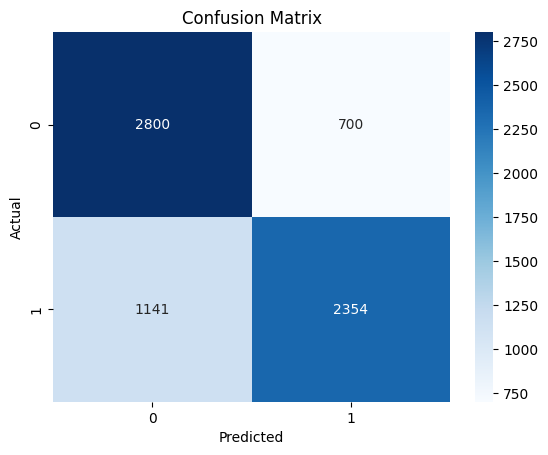

In [24]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [25]:
# --- Classification Report ---
print("Classification Report:\n", classification_report(y_test, y_pred))

Classification Report:
               precision    recall  f1-score   support

           0       0.71      0.80      0.75      3500
           1       0.77      0.67      0.72      3495

    accuracy                           0.74      6995
   macro avg       0.74      0.74      0.74      6995
weighted avg       0.74      0.74      0.74      6995



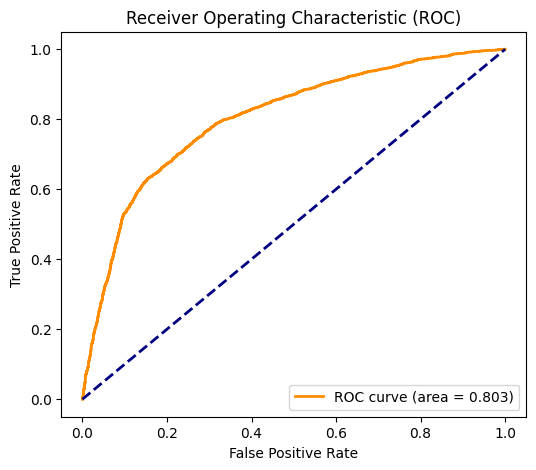

In [26]:
# --- ROC Curve ---
fpr, tpr, thresholds = roc_curve(y_test, y_proba)
roc_auc = auc(fpr, tpr)
plt.figure(figsize=(6, 5))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.3f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()

0.7188883799053291


C:\Users\Gaurav\AppData\Local\Temp\ipykernel_21484\1539491281.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importances', y='Feature Id', data=fi, palette='viridis')


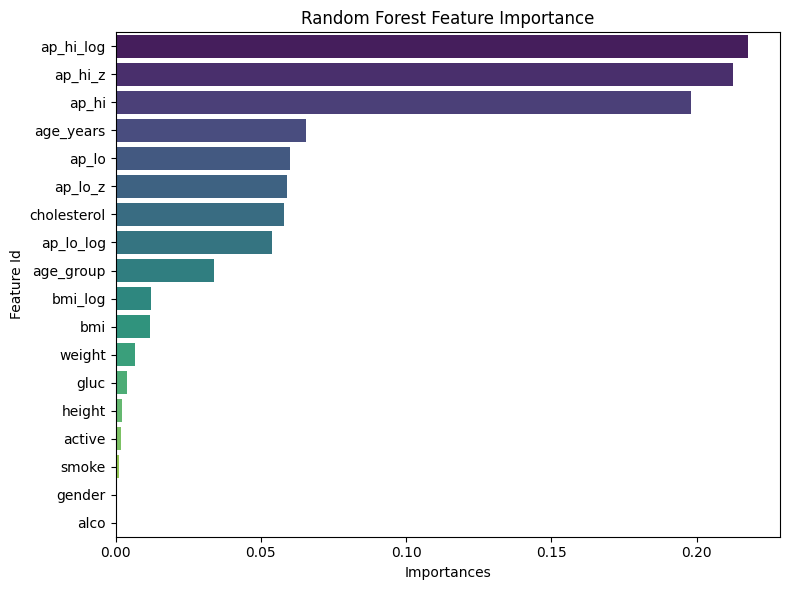

In [ ]:
fi = pd.DataFrame({
    'Feature Id': features,
    'Importances': rf_model.feature_importances_
}).sort_values('Importances', ascending=False)

print(f1)
plt.figure(figsize=(8, 6))
sns.barplot(x='Importances', y='Feature Id', data=fi, palette='viridis')
plt.title("Random Forest Feature Importance")
plt.tight_layout()
plt.show()

In [32]:
scaler_hi = StandardScaler().fit(X_train[['ap_hi']])
scaler_lo = StandardScaler().fit(X_train[['ap_lo']])

<h2>Save model on disk</h2>

In [33]:
import joblib

# After training your model
feature_order = list(X_train.columns)
joblib.dump({
    'model': rf_model, 
    'columns': list(X_train.columns),
    'scaler_hi': scaler_hi,
    'scaler_lo': scaler_lo
}, 'cardio_model.pkl')

['cardio_model.pkl']

In [ ]:
import joblib

feature_order = list(X_train.columns)
joblib.dump({ 'model': rf_model, 'columns': feature_order}, 'cardio_model.pkl')